In [1]:
import numpy as np

from src.graphic_interface.simu_result import load_all_simulation
from src.surface.surface_Fourier import Surface_Fourier,plot,plot_function_on_surface


In [2]:
column_labels=["Name","lambda","Penalization","cost B","max B","cost j","max j","EM cost","Distance","perimeter","Max curv","nit"]
path='tmp/'
lst_simu=load_all_simulation(path)
values_lambda = set(map(lambda x:x.lamb, lst_simu))
newlist_simu = [[y for y in lst_simu if y.lamb==x] for x in values_lambda]

without_curv_lambda_small
with_curv_lambda_small
with_curv
output_test


In [3]:
data=[]
lst_surf=[]
for i in range(len(values_lambda)):
    #we add the ref
    partial_lst=newlist_simu[i]
    elt=partial_lst[0]
    data_dic=elt.get_data_dic_ref()
    data.append([data_dic[col_name] for col_name in column_labels])#get the item corresponding to the column label
    lst_surf.append(elt.S_ref)
    for elt in partial_lst:
        data_dic=elt.get_data_dic()
        data.append([data_dic[col_name] for col_name in column_labels])#get the item corresponding to the column label
        lst_surf.append(elt.S)
for i,row in enumerate(data):
    row.append(str(i))

In [4]:
column_labels_latex=["Name","\lambda","Penalization","\chi_B^2","|B_{err}|_\infty","\chi_j^2","|j|_\infty","EM cost","\\text{Distance } (m)","\\text{Perimeter }(m^2)","\\text{Maximal curvature }(m^{-1})","\\text{number of iteration}"," number"]
tex="\\begin{array}{"+'S'*len(column_labels_latex)+'} \n'
tex+= '&'.join(column_labels_latex)+'\\\\ \n'
for row in data:
    tex+= '&'.join(row)+'\\\\ \n'
tex+="\\end{array}"
#print(tex)


In [5]:
from IPython.display import display, Math, Latex
display(Math(tex))

<IPython.core.display.Math object>

In [6]:
Sp_parametrization=Surface_Fourier.load_file('data/li383/plasma_surf.txt')
Sp=Surface_Fourier(Sp_parametrization,(64,64),3)

In [7]:
To_plot=[Sp,lst_surf[5]]
plot(To_plot)

In [8]:
S=lst_surf[1]
plot_function_on_surface(S,np.maximum(np.abs(S.principles[0]),np.abs(S.principles[1])))

In [112]:
import tqdm
simu=newlist_simu[1][0]
lst_dic=[]
npts=25
ntot_simu=len(simu.result.allvecs)
t = [int(i*((ntot_simu-1)//npts)) for i in range(npts)]
t.append(ntot_simu-1)
t+=range(1,(ntot_simu-1)//npts,2)
t=np.sort(t)
for i in tqdm.tqdm(range(len(t))):
    elt=simu.result.allvecs[t[i]]
    lst_dic.append(simu.get_data_dic(elt))
print(lst_dic[0]['Name'])

100%|██████████| 66/66 [05:56<00:00,  5.40s/it]

tmp/without_curv_lambda_small


In [111]:
np.sort(t)

array([   0,    1,    3,    5,    7,    9,   11,   13,   15,   17,   19,
         21,   23,   25,   27,   29,   31,   33,   35,   37,   39,   41,
         43,   45,   47,   49,   51,   53,   55,   57,   59,   61,   63,
         65,   67,   69,   71,   73,   75,   77,   79,   80,  160,  240,
        320,  400,  480,  560,  640,  720,  800,  880,  960, 1040, 1120,
       1200, 1280, 1360, 1440, 1520, 1600, 1680, 1760, 1840, 1920, 2000])

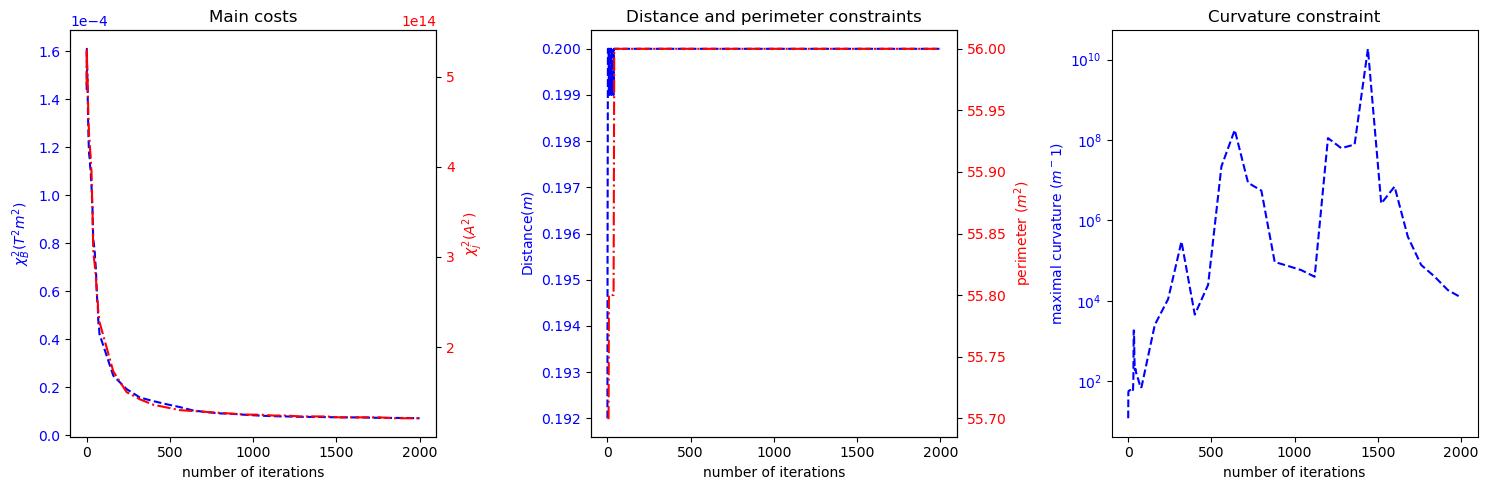

In [113]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

costsB=[float(dic['cost B']) for dic in lst_dic]
costsJ=[float(dic['cost j']) for dic in lst_dic]

lst_constaint_string=['Distance','perimeter','Max curv']
lst_constaint=[[float(lst_dic[i][constaint]) for i in range(len(t))]for constaint in lst_constaint_string]
# Create some mock data

fig, ((ax1),(ax3),(ax5)) = plt.subplots(1,3)

color_left = 'blue'
style_left='b--'
color_right = 'red'
style_right='r-.'

ax1.set_title('Main costs')
ax1.set_xlabel('number of iterations')
ax1.set_ylabel('$\chi_B^2 (T^2 m^2)$', color=color_left)
ax1.plot(t, costsB, style_left)
ax1.tick_params(axis='y', labelcolor=color_left)
ax1.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('$\chi_j^2 (A^2)$', color=color_right)  # we already handled the x-label with ax1
ax2.plot(t, costsJ,style_right)
ax2.tick_params(axis='y', labelcolor=color_right)
ax2.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


#Distance
ax3.set_title('Distance and perimeter constraints')
ax3.set_xlabel('number of iterations')
ax3.set_ylabel('Distance($m$)', color=color_left)
ax3.plot(t, lst_constaint[0],style_left)
ax3.tick_params(axis='y', labelcolor=color_left)
#ax3.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

ax4 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
ax4.set_ylabel('perimeter ($m^2$)', color=color_right)  # we already handled the x-label with ax1
ax4.plot(t, lst_constaint[1], style_right)
ax4.tick_params(axis='y', labelcolor=color_right)
#ax4.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


#perimeter  
#ax4.set_title('perimeter constraint')

#ax4.set_xlabel('number of iterations')
#ax4.legend()
#ax4.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

#curvature 
ax5.set_title('Curvature constraint')
ax5.plot(t,lst_constaint[2],style_left)
ax5.set_yscale('log')
ax5.set_ylabel('maximal curvature ($m^-1$)',color=color_left)
ax5.set_xlabel('number of iterations')
ax5.tick_params(axis='y', labelcolor=color_left)
#ax5.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

fig.tight_layout()  # otherwise the right y-label is slightly clipped